<a href="https://colab.research.google.com/github/guillermohenrion/AI/blob/master/tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow Hola mundo


In [28]:
!pip install tensorflow==2.0.0-alpha0 

In [29]:
import tensorflow as tf
import keras as ks
import numpy as np

model=ks.Sequential([ks.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs=np.array([-1, 0, 1, 2, 3, 4], dtype=float)
ys=np.array([-3, -1, 1, 3, 5, 7], dtype=float)

model.fit(xs, ys, epochs=500)



Epoch 1/500
6/6 [==============================] - 0s 5ms/step - loss: 4.2804
Epoch 2/500
6/6 [==============================] - 0s 251us/step - loss: 3.5360
Epoch 3/500
6/6 [==============================] - 0s 408us/step - loss: 2.9469
Epoch 4/500
6/6 [==============================] - 0s 181us/step - loss: 2.4800
Epoch 5/500
6/6 [==============================] - 0s 173us/step - loss: 2.1094
Epoch 6/500
6/6 [==============================] - 0s 338us/step - loss: 1.8146
Epoch 7/500
6/6 [==============================] - 0s 166us/step - loss: 1.5794
Epoch 8/500
6/6 [==============================] - 0s 289us/step - loss: 1.3913
Epoch 9/500
6/6 [==============================] - 0s 166us/step - loss: 1.2403
Epoch 10/500
6/6 [==============================] - 0s 190us/step - loss: 1.1184
Epoch 11/500
6/6 [==============================] - 0s 246us/step - loss: 1.0196
Epoch 12/500
6/6 [==============================] - 0s 200us/step - loss: 0.9390
Epoch 13/500
6/6 [=====================

In [0]:
model.predict([15])
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Tensorflow conjunto de datos fashion mnist

[Fashion-mnist](https://github.com/zalandoresearch/fashion-mnist)

In [0]:
fashion_nmist = ks.datasets.fashion_mnist
(train_images, train_labes), (test_images, test_labels) = fashion_nmist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

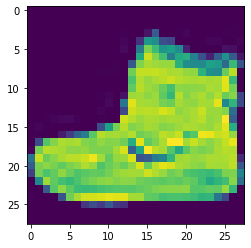

In [32]:
import matplotlib.pyplot as plt

plt.imshow(train_images[0])
print(train_images[0])
print(train_labes[0])


In [0]:
#Normalización
train_images=train_images/255
test_images=test_images/255

In [34]:
model = ks.Sequential([
    ks.layers.Flatten(),
    ks.layers.Dense(128, activation=tf.nn.relu),
    ks.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labes, epochs=5)


Epoch 1/5
60000/60000 [==============================] - 7s 112us/step - loss: 0.4952 - accuracy: 0.8265
Epoch 2/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.3751 - accuracy: 0.8639
Epoch 3/5
60000/60000 [==============================] - 6s 104us/step - loss: 0.3360 - accuracy: 0.8758
Epoch 4/5
60000/60000 [==============================] - 8s 126us/step - loss: 0.3103 - accuracy: 0.8863
Epoch 5/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.2926 - accuracy: 0.8924


In [35]:
model.evaluate(test_images, test_labels)


10000/10000 [==============================] - 0s 35us/step


[0.34443056086301804, 0.8758999705314636]

In [75]:
classifications = model.predict(test_images)

print(classifications[0])
max=0
valmax=classifications[0][0]
print(valmax)
for i in range(10):
    if classifications[0][i]>valmax:
        valmax=classifications[0][i]
        max=i
        
print(max)
print(test_labels[0])

[7.9948522e-06 2.5647748e-07 6.0769848e-06 2.1124129e-06 1.4417865e-05
 4.2860471e-03 9.2410919e-06 1.1212894e-02 2.9044325e-04 9.8417044e-01]
7.994852e-06
9
9


In [37]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.6):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
59616/60000 [============================>.] - ETA: 0s - loss: 0.4744 - accuracy: 0.8311
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 8s 138us/sample - loss: 0.4737 - accuracy: 0.8314
